# **Práctica Deep Learning (Python / Jupyter)**

## 1. Carga de datos

In [1]:
# Importamos las librerías y funciones necesarias para el proyecto
import numpy as np
from numpy import moveaxis
import pandas as pd
import imageio as io
import cv2
import PIL.Image
import seaborn as sns
import concurrent
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # Para mostrar las filas.
pd.set_option('display.max_columns', None) # Para mostrar las columnas.

In [2]:
# Descarguemos el conjunto de datos
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-06-18 20:06:09--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [  <=>               ]  54.31M  3.21MB/s    in 18s     

2022-06-18 20:06:28 (3.10 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [3]:
# Comprobando lo que descargamos
!ls -ll

total 111584
-rw-r--r-- 1 root root 56950929 Jun 18 20:06 airbnb-listings.csv
drwxr-xr-x 1 root root     4096 Jun 15 13:42 sample_data
-rw-r--r-- 1 root root 11444238 Jun 18 19:54 test.csv
-rw-r--r-- 1 root root 45846586 Jun 18 19:54 train.csv


In [4]:
# Leamos el conjunto de datos usando Pandas y mostremos algunas filas
data = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,The closest metro is La latina which will take...,The full studio will be entirely to the guests...,I am delighted to preform the check in at the ...,NaN,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://a0.muscache.com/im/pictures/d1a2212d-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d1a2212d-c...,96019257,https://www.airbnb.com/users/show/96019257,Marina,2016-09-20,"Madrid, Community of Madrid, Spain",I have a serious addiction for traveling :0l! ...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/fffbb86e-5...,https://a0.muscache.com/im/pictures/fffbb86e-5...,NaN,2.0,2.0,"email,phone,facebook,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28005, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.407453,-3.707995,Loft,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Pets all...",NaN,50.0,NaN,NaN,100.0,20.0,2,15,2,1125,today,NaN,13,24,42,66,2017-04-07,30,2016-10-15,2017-03-31,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,9470166,https://www.airbnb.com/rooms/9470166,20170407214119,2017-04-08,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable...",Quiet and comfortable space where you can rela...,"In the center, recently remodeled, comfortable...",none,It belongs to the district center of Madrid wh...,A la misma distancia en tiempo podrás acceder ...,"The nearest Metro station is Tirso de Molina ,...","You will be alone, while you are in my flat an...",If you have any questions while you are in the...,Check ins after 21h to 22h have an extra cost ...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://a0.muscache.com/im/pictures/3eb59287-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3eb59287-8...,9885245,https://www.airbnb.com/users/show/9885245,Jorge,2013-11-08,"Madrid, Community of Madrid, Spain",NaN,within an hour,100.0,NaN,https://a0.muscache.com/im/users/9885245/profi...,https://a0.muscache.com/im/users/9885245/profi...,Hortaleza,13.0,13.0,"email,phone,reviews,jumio","Madrid, Comunidad de Madrid 28012, Spain",NaN,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.408316,-3.705006,Apartment,Entire ho

In [5]:
# Verifiquemos la forma de nuestro conjunto de datos. Filas y columnas (variables)
data.shape

(14001, 89)

In [6]:
# Nombres de variables
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

**Extraigamos las imágenes en una matriz**.  
Los necesitamos para crear un modelo que prediga el apartamento del precio basado en imágenes.

## **2. Separamos los datos de train y test**

In [7]:
from sklearn.model_selection import train_test_split

# Separamos en train y test
full_df = data
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de Train: {train.shape}')
print(f'Dimensiones del dataset de Test: {test.shape}')

# Guardamos ambos datasets por separado
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de Train: (11200, 89)
Dimensiones del dataset de Test: (2801, 89)


# **3. Pre-procesado de datos**

In [8]:
train = pd.read_csv('./train.csv', sep=';', decimal='.')
train.head().T

,0,1,2,3,4
ID,6512631,6835710,545768,15098637,16344240
Listing Url,https://www.airbnb.com/rooms/6512631,https://www.airbnb.com/rooms/6835710,https://www.airbnb.com/rooms/545768,https://www.airbnb.com/rooms/15098637,https://www.airbnb.com/rooms/16344240
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Ideal para tus merecidas vacaciones,Beautiful double bedroom,Room 1 in Paseo la Castellana.,COZY ROOM IN TRIBUNAL CUARTO ACOGEDOR EN TRIBUNAL,Room in amazing flat 12th floor
Summary,"Nuestro lindo, cómodo y disfrutable apartament...","This is my very own room, but since I will be ...",NaN,Hola! Somos dos chicas que vivimos en pleno co...,"Near everyhing: 10 min. to the donwtonw, 15 mi..."
Space,"Un lindisimo apartamento, muy cómodo y con tod...",NaN,1924 Alba Guesthouse is located in the area of...,La habitación tiene todo lo necesario para que...,"My house is a unique place difficult to find, ..."
Description,"Nuestro lindo, cómodo y disfrutable apartament...","This is my very own room, but since I will be ...",1924 Alba Guesthouse is located in the area of...,Hola! Somos dos chicas que vivimos en pleno co...,"Near everyhing: 10 min. to the donwtonw, 15 mi..."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Barrio Moratalaz, ajardinado y muy tranquilo. ...",NaN,NaN,Malasaña es el barrio más moderno de la ciudad...,"Very wide, central and emblematic street of Ma..."


In [9]:
# Seleccionamos solamente los datos de Madrid:
train = train[train['City'] == 'Madrid']

# Seleccionamos solamente aquellas que tienen links a fotos:
train = train[train['Thumbnail Url'].notnull()]

Eliminamos aquellas features que no guardan relación con el precio de las viviendas:

- Aquellas de carácter descriptivo sin ningún tipo de lógica ('ID', 'Scrape ID', ...)
- Aquellas informativas de disponibilidad 'Has Availability', 'Availability 30','Availability 60','Availability 365','Availability 90' y con excepcción de 'Availability 365'

Además eliminamos algunas que requieren un tratamiento de datos más laborioso:

- Fechas, tiempos de respuesta, ...

Por último, al haber seleccionado Madrid, mantendremos 'Neighbourhood Cleansed' y eliminaremos:

- 'City'
- 'State'
- 'Zipcode', ...

In [10]:
# Eliminamos las columnas que no aportan información relevante
featuresDrop = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
    'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name',
    'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate',
    'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
    'Host Listings Count', 'Street', 'Neighbourhood', 'City', 'State', 'Zipcode', 'Market',
    'Smart Location', 'Country Code', 'Calendar last Scraped', 'Country', 'Bed Type', 'Weekly Price',
    'Monthly Price', 'Calendar Updated', 'Has Availability', 'Availability 30', 'First Review',
    'Last Review', 'License', 'Jurisdiction Names', 'Geolocation'
    ]
train.drop(featuresDrop, axis=1, inplace = True)

print(f'Ahora quedan {len(train.columns)} features:')
train.columns

Ahora quedan 37 features:


Index(['Thumbnail Url', 'Host Total Listings Count', 'Host Verifications',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Amenities', 'Square Feet', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month', 'Features'],
      dtype='object')

In [11]:
train.apply(lambda x: len(x.unique()))

Thumbnail Url                     8569
Host Total Listings Count           47
Host Verifications                 171
Neighbourhood Cleansed             125
Neighbourhood Group Cleansed        21
Latitude                          8571
Longitude                         8571
Property Type                       21
Room Type                            3
Accommodates                        15
Bathrooms                           17
Bedrooms                            11
Beds                                17
Amenities                         7544
Square Feet                         69
Price                              243
Security Deposit                    90
Cleaning Fee                        78
Guests Included                     13
Extra People                        46
Minimum Nights                      23
Maximum Nights                     137
Availability 60                     61
Availability 90                     91
Availability 365                   366
Number of Reviews        

In [12]:
train.shape

(8571, 37)

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,8569.0,8.679776,24.803799,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,8571.0,40.420604,0.020723,40.331888,40.409990,40.418939,40.428184,40.514247
Longitude,8571.0,-3.696942,0.024750,-3.835498,-3.708346,-3.701607,-3.693266,-3.573613
Accommodates,8571.0,3.056119,1.955574,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8546.0,1.250351,0.609283,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8553.0,1.271250,0.793353,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,8540.0,1.929040,1.496962,1.000000,1.000000,1.000000,2.000000,16.000000
Square Feet,304.0,344.740132,491.029680,0.000000,0.000000,85.500000,603.000000,2691.000000
Price,8567.0,61.751138,53.874769,9.000000,30.000000,50.000000,75.000000,850.000000
Security Deposit,3533.0,179.932069,104.738278,70.000000,100.000000,150.000000,200.000000,900.000000


Text(0, 0.5, 'Frequency')

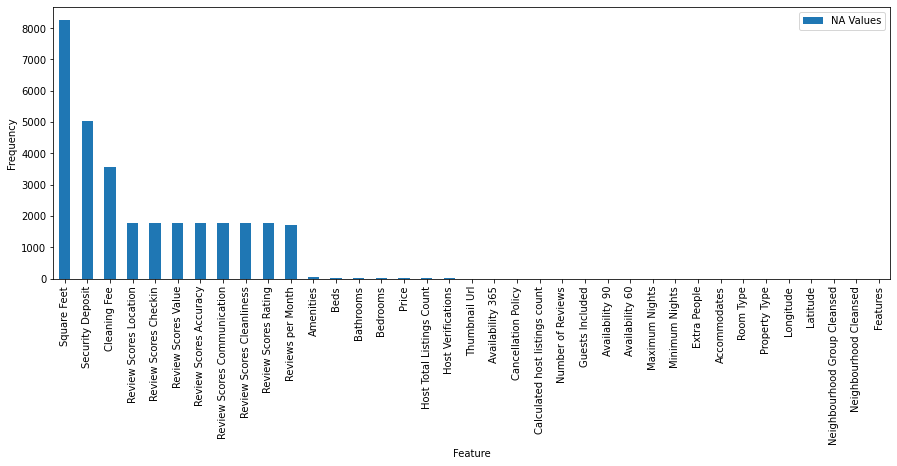

In [14]:
# Representamos los NA:
df_airbnbTrainNa = pd.DataFrame(len(train) - train.count(), columns=['NA Values']).sort_values('NA Values', ascending = False)

ax = df_airbnbTrainNa.plot(kind = 'bar', figsize = (15, 5))
ax.set_xlabel("Feature")
ax.set_ylabel("Frequency")

En vista de estos resultados procedemos de la siguiente manera:

1. Eliminamos la coluna de Square Feet porque tiene demasiados NAs y no existe una lógica para rellenarlos.

2. Entendemos que tanto los NA del Security Deposit como los NA del Cleaning Fee es porque no se ha rellenado y debería ser cero.

3. Con respecto a las Reviews que faltan vamos a rellenar con la moda en cada caso.

In [15]:
# Eliminamos 'Square Feet'
train = train.drop('Square Feet', axis = 1)

# Rellenamos 'Security Deposit' y 'Cleaning Fee' con ceros
train['Security Deposit'] = train['Security Deposit'].fillna(0)
train['Cleaning Fee'] = train['Cleaning Fee'].fillna(0)

# Rellenamos los campos NA de las Reviews con la moda en cada caso
reviewFeatures = [
    'Review Scores Location', 'Review Scores Value', 'Review Scores Checkin', 'Review Scores Accuracy',
    'Review Scores Communication', 'Review Scores Cleanliness', 'Review Scores Rating', 'Reviews per Month'
    ]

for reviewType in reviewFeatures:
    train[reviewType] = train[reviewType].fillna(train[reviewType].mode()[0])

## 3.1 Generación de nuevas características

A continuación procedemos a calcular una nueva feature llamada "Avg Review" que será la media de las reviews de Location, Value, Checkin, Accuracy, Communication y Cleanliness. Posteriormente eliminamos las columnas correspondientes a las reviews antiguas:

In [16]:
reviewFeaturesAppartment = [
    'Review Scores Location', 'Review Scores Value', 'Review Scores Checkin', 'Review Scores Accuracy',
    'Review Scores Communication', 'Review Scores Cleanliness'
    ]

# Nueva columna con la media de las reviews:
train['Avg Review Score'] = train[reviewFeaturesAppartment].mean(numeric_only = True, axis = 1)

# Eliminamos las columnas en reviewFeatures
train = train.drop(reviewFeaturesAppartment, axis = 1)

In [17]:
# Eliminamos todos los NA del DataFrame:
train = train.dropna()

In [18]:
# Comprobamos que todos los valores son distintos de NA.
train.isna().any()

Thumbnail Url                     False
Host Total Listings Count         False
Host Verifications                False
Neighbourhood Cleansed            False
Neighbourhood Group Cleansed      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Amenities                         False
Price                             False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Availability 60                   False
Availability 90                   False
Availability 365                  False
Number of Reviews                 False


In [19]:
# Para dar valor a las features 'Host Verifications', 'Amenities' y 'Features', crearemos 3 nuevas variables con el recuento de cada una de ellas. Posteriormente eliminamos las variables antiguas:

# Calculamos el total en cada caso, añadimos las columnas calculadas a airbnbTrain
for item in ['Host Verifications', 'Amenities', 'Features']:
    train[item + ' Count'] = [len(item.split(',')) for item in train[item]]

# Eliminamos las columnas originales
train = train.drop(['Host Verifications', 'Amenities', 'Features'], axis = 1)

print(f'Dimensiones finales del dataset de training: {train.shape}')

Dimensiones finales del dataset de training: (8470, 31)


In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,8470.0,8.730342,24.880610,0.000000,1.000000,2.000000,5.000000,265.000000
Latitude,8470.0,40.420602,0.020672,40.331888,40.410023,40.418910,40.428146,40.514247
Longitude,8470.0,-3.696952,0.024646,-3.835498,-3.708319,-3.701612,-3.693284,-3.573613
Accommodates,8470.0,3.064345,1.955640,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8470.0,1.249528,0.602017,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8470.0,1.271901,0.794569,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,8470.0,1.932231,1.498025,1.000000,1.000000,1.000000,2.000000,16.000000
Price,8470.0,61.683943,53.445232,9.000000,30.000000,50.000000,75.000000,850.000000
Security Deposit,8470.0,74.684179,111.445681,0.000000,0.000000,0.000000,150.000000,900.000000
Cleaning Fee,8470.0,16.164345,20.346901,0.000000,0.000000,10.000000,27.000000,250.000000


In [21]:
# Vemos que tenemos datos de tipo object en nuestro dataFrame
train.dtypes

Thumbnail Url                      object
Host Total Listings Count         float64
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Review Scores Rating              

In [22]:
# Las features categóricas y las numérias vienen especificadas a continuación:
categoricalFeatures = [
    'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type',
    'Room Type','Cancellation Policy'
    ]

numericalFeatures = [
    'Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
    'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Minimum Nights', 'Maximum Nights',
    'Availability 365', 'Number of Reviews', 'Host Verifications Count', 'Amenities Count',
    'Features Count', 'Avg Review Score'
    ]

In [23]:
# Usamos MeanEncoder para la codificación de variables categóricas:
mean_map = {}
for item in categoricalFeatures:
    mean = train.groupby(item)['Price'].mean()
    train[item] = train[item].map(mean)
    mean_map[item] = mean

In [24]:
train.dtypes

Thumbnail Url                      object
Host Total Listings Count         float64
Neighbourhood Cleansed            float64
Neighbourhood Group Cleansed      float64
Latitude                          float64
Longitude                         float64
Property Type                     float64
Room Type                         float64
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Review Scores Rating              

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Total Listings Count,8470.0,8.730342,24.880610,0.000000,1.000000,2.000000,5.000000,265.000000
Neighbourhood Cleansed,8470.0,61.683943,19.081090,17.333333,50.798507,63.902564,73.328035,280.000000
Neighbourhood Group Cleansed,8470.0,61.683943,13.457546,29.689655,53.896226,67.100145,67.100145,85.959364
Latitude,8470.0,40.420602,0.020672,40.331888,40.410023,40.418910,40.428146,40.514247
Longitude,8470.0,-3.696952,0.024646,-3.835498,-3.708319,-3.701612,-3.693284,-3.573613
Property Type,8470.0,61.683943,6.810676,15.000000,63.405087,63.405087,63.405087,203.750000
Room Type,8470.0,61.683943,25.579197,25.333333,33.682289,84.765059,84.765059,84.765059
Accommodates,8470.0,3.064345,1.955640,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,8470.0,1.249528,0.602017,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,8470.0,1.271901,0.794569,0.000000,1.000000,1.000000,1.000000,10.000000


In [26]:
train.drop('Thumbnail Url', axis=1,inplace=False).head(2)

,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Avg Review Score,Host Verifications Count,Amenities Count,Features Count
0,1.0,30.333333,33.877193,40.397237,-3.637805,63.405087,84.765059,2,1.0,1.0,1.0,48.0,0.0,30.0,1,0,3,10,38,68,68,26,95.0,54.385116,1,1.21,9.833333,4,18,3
1,1.0,63.565217,69.208333,40.439728,-3.677433,63.405087,33.682289,2,1.0,1.0,1.0,70.0,0.0,20.0,1,0,1,1125,11,30,30,3,100.0,69.257106,1,0.14,10.000000,4,22,3


ValueError: ignored

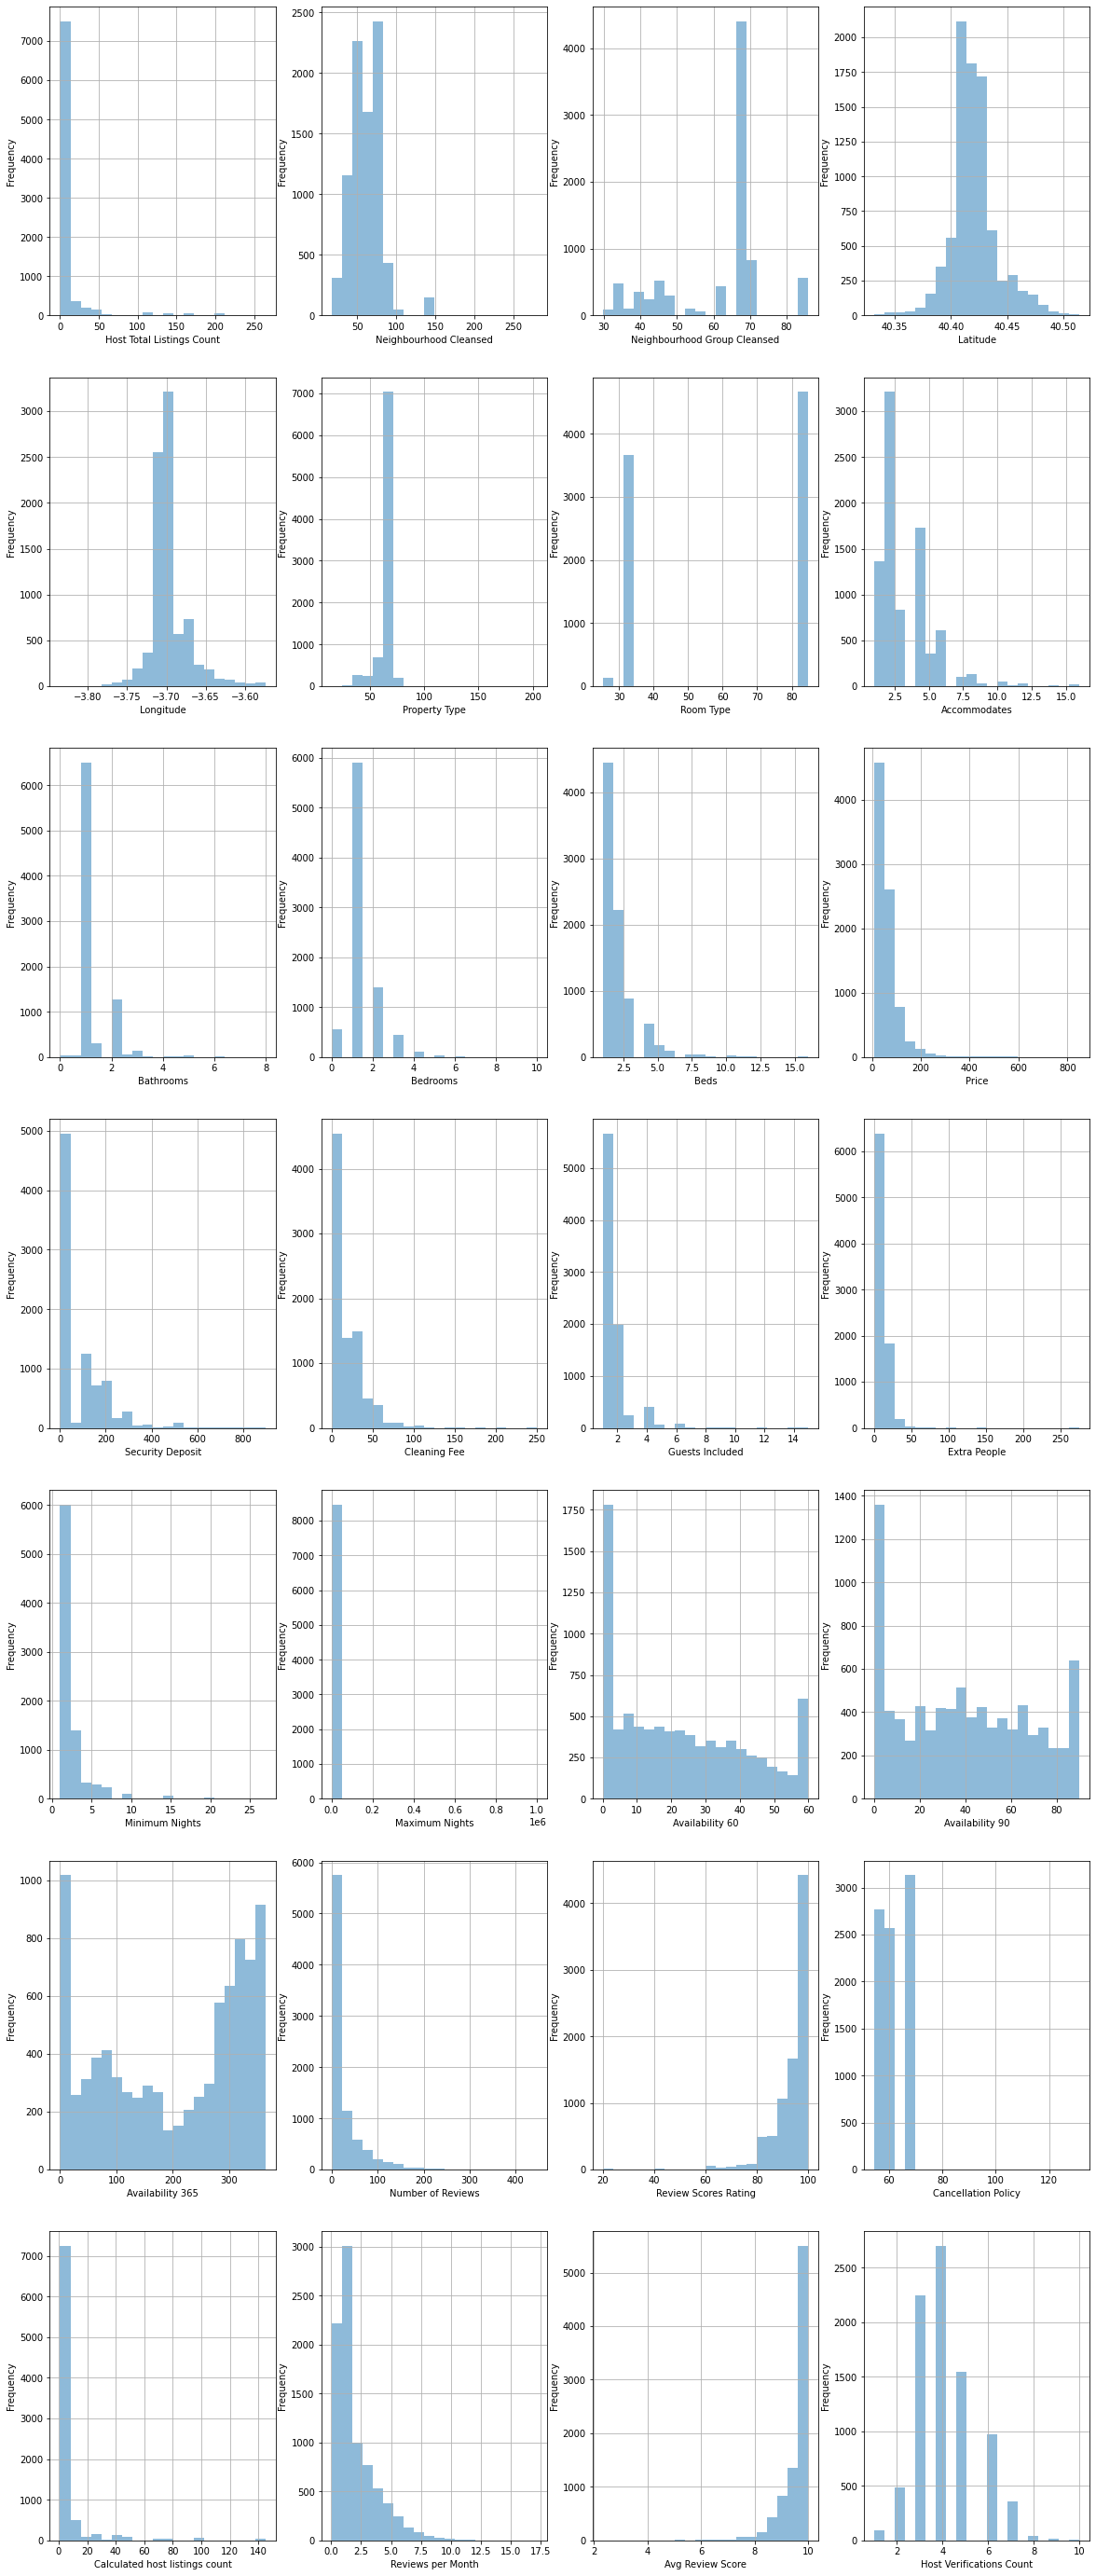

In [27]:
# Volvemos a representar la distribución de datos:
plt.figure(figsize=(20, 50))
temp = train.drop('Thumbnail Url', axis=1,inplace=False)
for i in range(0, len(temp.columns)):
    plt.subplot(7, 4, i + 1)
    temp[temp.columns[i]].plot.hist(alpha=0.5, bins=20, grid = True)
    plt.xlabel(temp.columns[i])

In [28]:
# En vista de estos histogramas, restringimos los datos de la siguiente manera:
train = train[train['Host Total Listings Count'] < 150]
train = train[train['Bathrooms'] < 7]
train = train[train['Cleaning Fee'] < 600]
train = train[train['Guests Included'] < 10]
train = train[train['Minimum Nights'] < 50]
train = train[train['Maximum Nights'] < 2000]

In [29]:
# Limpieza adicional de las variables Bathrooms y Beds
train.loc[train['Bathrooms'] == 0.5, 'Bathrooms'] = 0
train.loc[train['Bathrooms'] == 1.5, 'Bathrooms'] = 1
train.loc[train['Bathrooms'] == 2.5, 'Bathrooms'] = 2
train = train[train.Bathrooms != 0]
train = train[train.Beds != 0]

ValueError: ignored

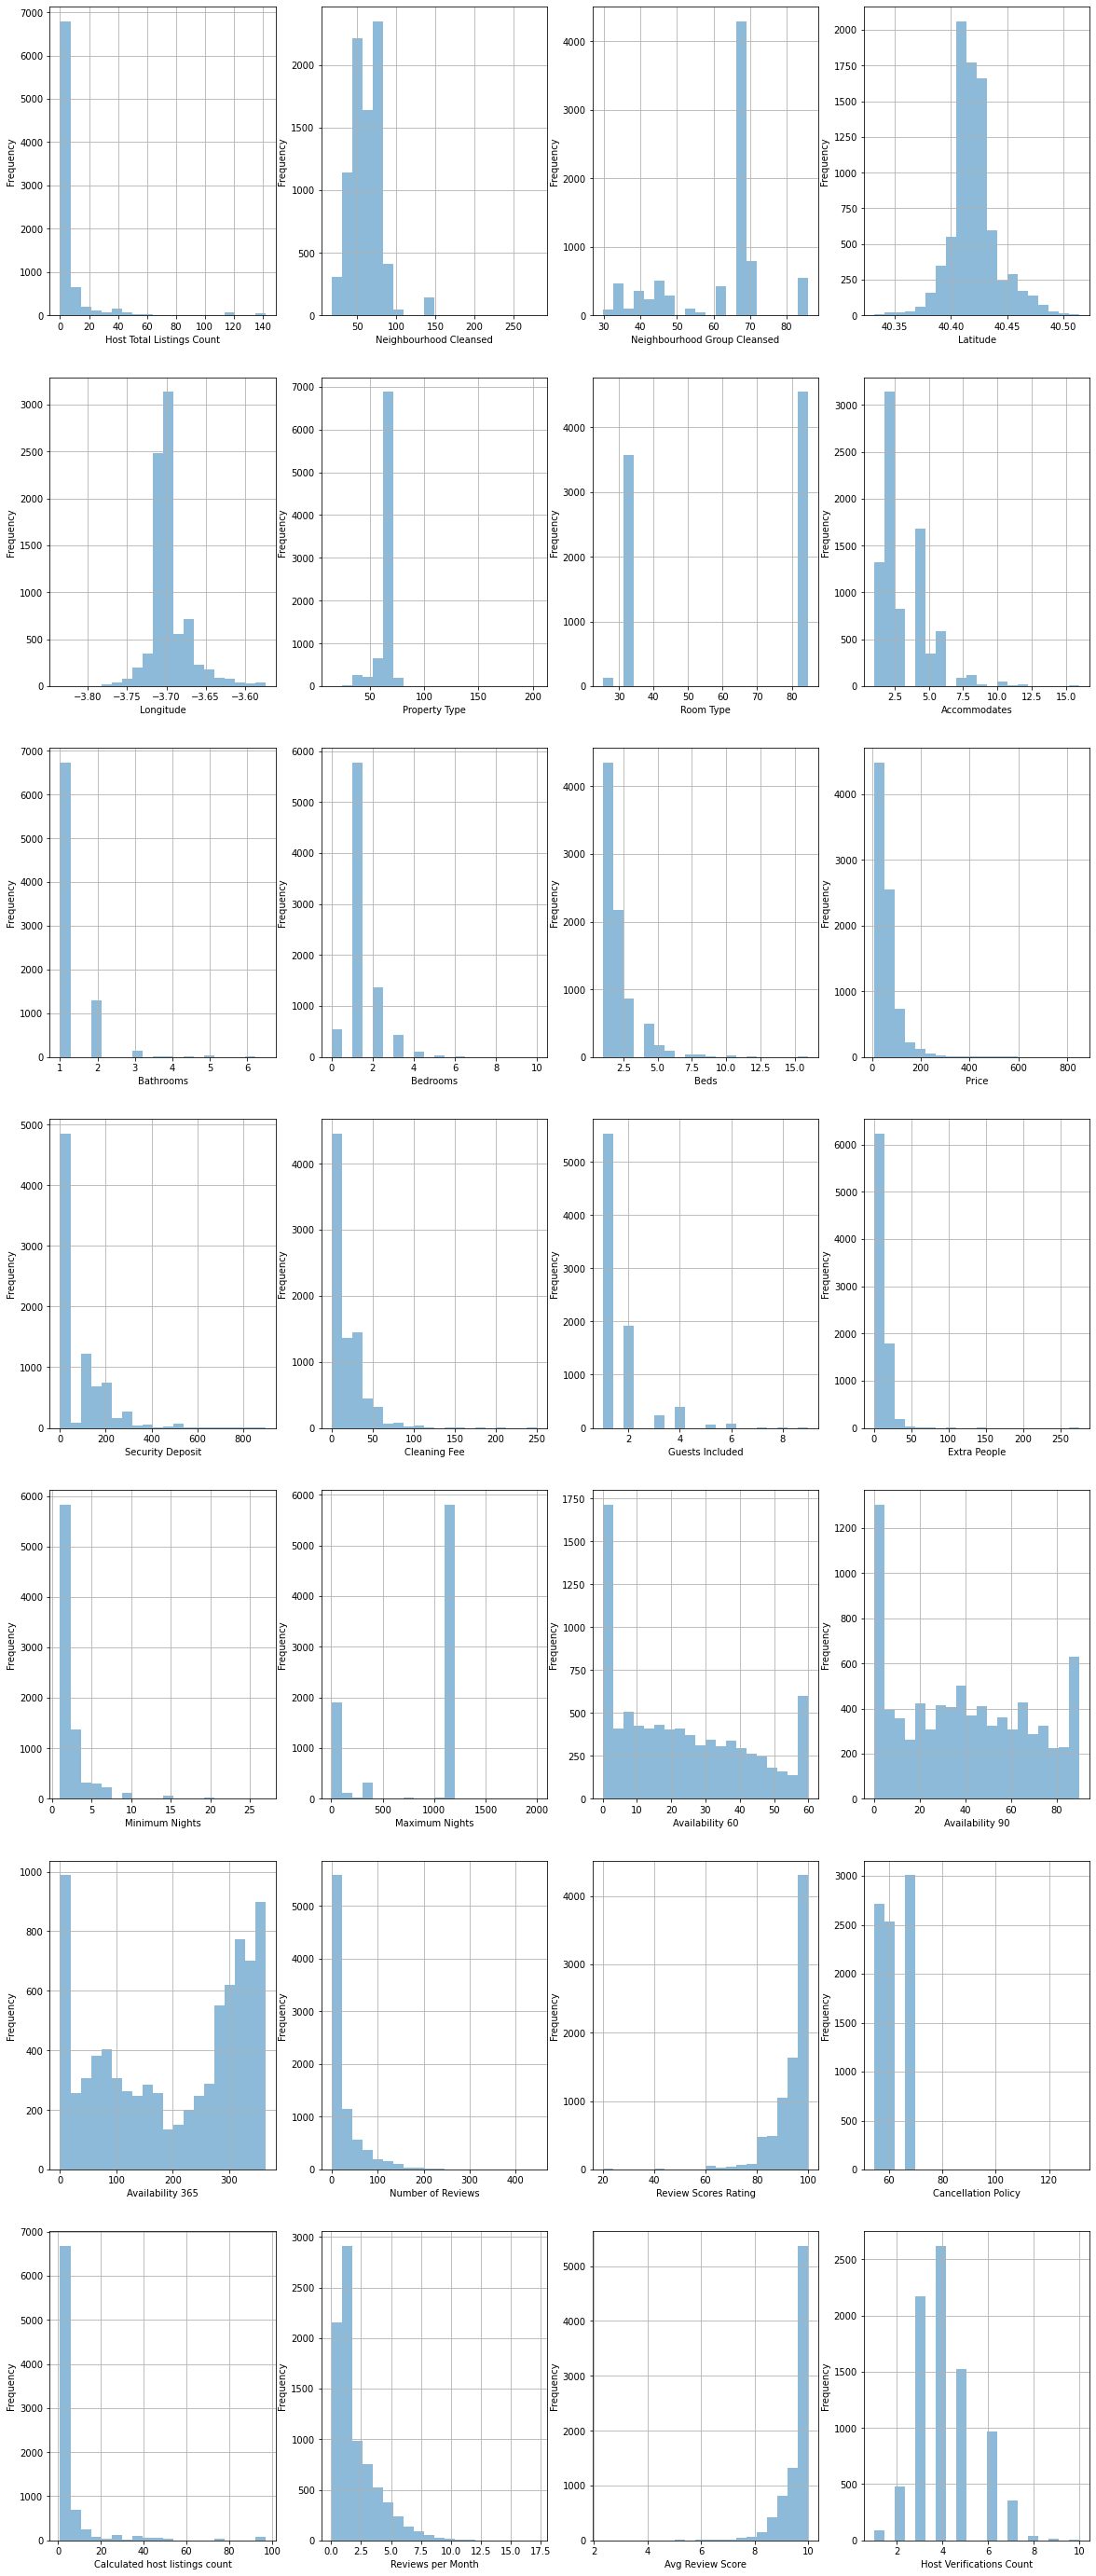

In [30]:
# Volvemos a representar la distribución de datos:
plt.figure(figsize=(20, 50))
temp = train.drop('Thumbnail Url', axis=1,inplace=False)
for i in range(0,len(temp.columns)):
    plt.subplot(7, 4, i + 1)
    temp[temp.columns[i]].plot.hist(alpha=0.5, bins=20, grid = True)
    plt.xlabel(temp.columns[i])

# 3.4 Análisis de correlación

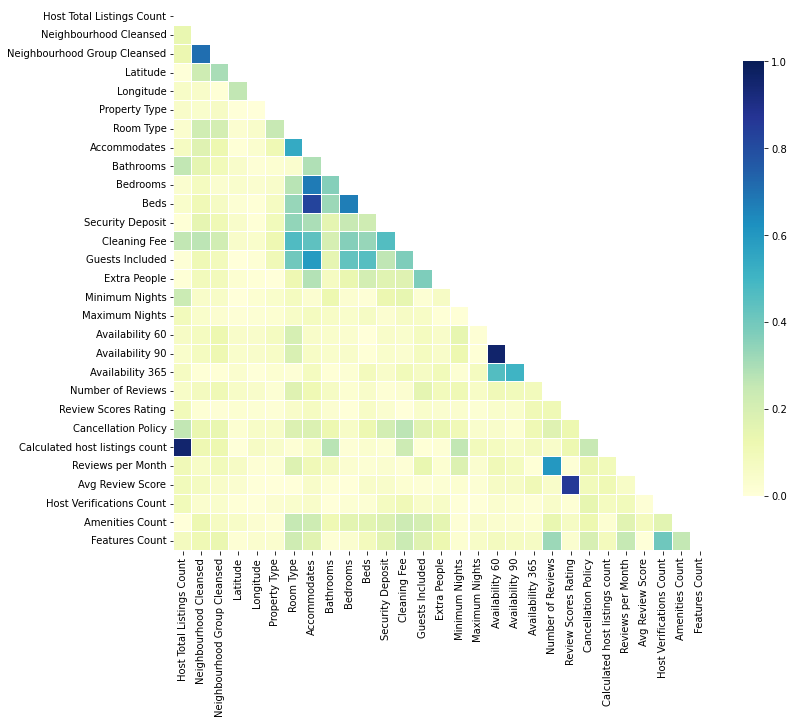

In [31]:
# Calcular la matriz de correlación
corr = np.abs(train.drop(['Price'], axis = 1).corr())

# Generar una máscara para el triángulo superior
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(12, 10))

# Dibuja el mapa de calor con la máscara y la relación de aspecto correcta
sns.heatmap(corr, mask = mask,vmin = 0.0, vmax = 1.0, center = 0.5,
            linewidths = .1, cmap = "YlGnBu", cbar_kws = {"shrink": .8})

plt.show()

Vemos que hay 3 pares de variables correlacionadas:

- Accommodates con Beds (que tiene sentido)
- Review Scores Rating con Avg Review Score
- Host Total Listings Count con Calculated host listings count

Eliminaremos entonces Accommodates, Avg Review Score y Host Total Listings count

In [32]:
train = train.drop(['Accommodates', 'Avg Review Score', 'Host Total Listings Count'], axis = 1)

# 4. Descarga de imágenes del dataset de train

In [33]:
train.head(3)

,Thumbnail Url,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Verifications Count,Amenities Count,Features Count
0,https://a0.muscache.com/im/pictures/81905747/9...,30.333333,33.877193,40.397237,-3.637805,63.405087,84.765059,1.0,1.0,1.0,48.0,0.0,30.0,1,0,3,10,38,68,68,26,95.0,54.385116,1,1.21,4,18,3
1,https://a0.muscache.com/im/pictures/86900079/7...,63.565217,69.208333,40.439728,-3.677433,63.405087,33.682289,1.0,1.0,1.0,70.0,0.0,20.0,1,0,1,1125,11,30,30,3,100.0,69.257106,1,0.14,4,22,3
2,https://a0.muscache.com/im/pictures/6703468/7c...,53.357143,47.835570,40.455906,-3.696266,37.325000,33.682289,1.0,1.0,1.0,40.0,0.0,0.0,1,10,1,1125,47,77,352,27,92.0,54.385116,4,0.50,4,10,4


In [34]:
train['Thumbnail Url'].isna().sum()
n_images= len(train['Thumbnail Url'])
n_images

8261

In [35]:
# Vamos a crear una lista con la URL de la imagen y el índice
images_paths = []
for i, img_url in enumerate(train['Thumbnail Url']):
    images_paths.append([i, img_url])

In [36]:
# Esta función descarga las imágenes y las devuelve con el índice donde guardarlas
def get_image(data_url, target_size=(112, 112)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # Si la información de los canales está en primer lugar, muévase a la última posición
        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2] ):
            img= moveaxis(img, 0, 2)
        #if(img.shape[2] == 4):
        #    img = img.convert('RGB')
        # En caso de que alguna imagen sea RGBA, tome solo canales RGB
        img = img[:,:,:3]
        # Algunas imágenes pueden estar en blanco y negro. Convierto a RGB ya que de lo contrario genera error
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [37]:
# Tensor para guardar las imágenes
loaded_images = np.zeros((len(images_paths), 112,112, 3), dtype=np.uint8)

# Tensor para comprobar qué imágenes no se guardaron
was_loaded = np.zeros(len(images_paths))

In [38]:
print(loaded_images.shape)

(8261, 112, 112, 3)


In [39]:
# Creando grupo para cargar imágenes. De forma predeterminada, utiliza tantos núcleos como su máquina tiene
#images_paths = images_train

for (img, idx) in tqdm(map(get_image, images_paths), total=len(images_paths)):
    # Cargando las imágenes
    if img is not None:
        loaded_images[idx] = img
        was_loaded[idx] = 1
    else:
        was_loaded[idx] = 0

print('Finalizado!')
print(f'Número de imágenes cargadas: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 8261/8261 [34:51<00:00,  3.95it/s]

Finalizado!
Número de imágenes cargadas: 8233.0/8261


In [40]:
# Guardar imágenes. Recomendaría guardar esto para no repetir este proceso.
np.save('images_train.npy', loaded_images)
np.save('was_loaded_train.npy', was_loaded)

In [41]:
y_train = train['Price']
X_train_data = train.drop(['Price','Thumbnail Url'], axis=1)
X_train_image = np.load('images_train.npy')

In [42]:
print(X_train_data.shape)
print(y_train.shape)
print(X_train_image.shape)

(8261, 26)
(8261,)
(8261, 112, 112, 3)


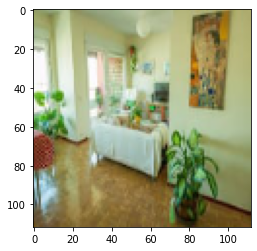

In [43]:
plt.imshow(X_train_image[1])

## 4.1. Preprocesado de los datos de test

In [44]:
# Cargamos el test set, y limpiamos el data set de la misma forma que lo hemos hecho con el training set:

# Cargamos el data set de test para trabajarcon él
test = pd.read_csv('./test.csv', sep= ';', decimal = '.')

# Seleccionamos solamente los datos de Madrid
test = test[test['City'] == 'Madrid']

# Seleccionamos solamente aquellas que tienen links a fotos:
test = test[test['Thumbnail Url'].notnull()]

# Eliminamos las columnas que no aportan información relevante
test.drop(featuresDrop, axis=1, inplace = True)

# Eliminamos 'Square Feet'
test = test.drop('Square Feet', axis = 1)

# Rellenamos 'Security Deposit' y 'Cleaning Fee' con ceros
test['Security Deposit'] = test['Security Deposit'].fillna(0)
test['Cleaning Fee'] = test['Cleaning Fee'].fillna(0)

# Rellenamos los campos NA de las Reviews con la moda en cada caso
for reviewType in reviewFeatures:
    test[reviewType] = test[reviewType].fillna(test[reviewType].mode()[0])

# Nueva columna con la media de las reviews:
test['Avg Review Score'] = test[reviewFeaturesAppartment].mean(numeric_only = True, axis = 1)

# Eliminamos las columnas en reviewFeatures
test = test.drop(reviewFeaturesAppartment, axis = 1)

# Eliminamos todos los NA del DataFrame:
test = test.dropna()

# Para dar valor a las features 'Host Verifications', 'Amenities' y 'Features', crearemos 3 nuevas variables con el recuento de cada una de ellas. Posteriormente eliminamos las variables antiguas:

# Calculamos el total en cada caso, añadimos las columnas calculadas a test
for item in ['Host Verifications', 'Amenities', 'Features']:
    test[item + ' Count'] = [len(item.split(',')) for item in test[item]]

# Eliminamos las columnas originales
test = test.drop(['Host Verifications', 'Amenities', 'Features'], axis = 1)

print(f'Dimensiones finales del dataset de testing: {test.shape}')

# Usamos MeanEncoder para la codificación de variables categóricas:
mean_map = {}
for item in categoricalFeatures:
    mean = test.groupby(item)['Price'].mean()
    test[item] = test[item].map(mean)
    mean_map[item] = mean

# En vista de estos histogramas, restringimos los datos de la siguiente manera:
test = test[test['Host Total Listings Count'] < 150]
test = test[test['Bathrooms'] < 7]
test = test[test['Cleaning Fee'] < 600]
test = test[test['Guests Included'] < 10]
test = test[test['Minimum Nights'] < 50]
test = test[test['Maximum Nights'] < 2000]

# Limpieza adicional de las variables Bathrooms y Beds
test.loc[test['Bathrooms'] == 0.5, 'Bathrooms'] = 0
test.loc[test['Bathrooms'] == 1.5, 'Bathrooms'] = 1
test.loc[test['Bathrooms'] == 2.5, 'Bathrooms'] = 2
test = test[test.Bathrooms != 0]
test = test[test.Beds != 0]

# Eliminaremos entonces Accommodates, Avg Review Score y Host Total Listings count
test = test.drop(['Accommodates', 'Avg Review Score', 'Host Total Listings Count'], axis = 1)

Dimensiones finales del dataset de testing: (2132, 31)


In [45]:
test.shape

(2089, 28)

In [46]:
test.head(3)

,Thumbnail Url,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Reviews per Month,Host Verifications Count,Amenities Count,Features Count
1,https://a0.muscache.com/im/pictures/3721aafd-a...,48.942857,40.742424,40.412484,-3.727753,62.047921,82.416526,1.0,2.0,3.0,50.0,150.0,80.0,2,5,1,1125,18,48,323,1,100.0,58.107739,44,0.29,4,6,4
2,https://a0.muscache.com/im/pictures/13535209/d...,73.831933,68.691532,40.423421,-3.698412,62.047921,82.416526,1.0,1.0,2.0,70.0,200.0,15.0,2,15,3,365,9,25,253,181,96.0,58.107739,1,3.69,3,23,5
4,https://a0.muscache.com/im/pictures/aeb451ae-4...,28.785714,36.453125,40.389909,-3.728353,62.047921,33.368421,1.0,1.0,1.0,18.0,0.0,5.0,2,0,1,4,17,17,17,7,97.0,58.107739,1,0.55,8,8,4


In [47]:
# Vamos a crear una lista con la URL de la imagen y el índice
images_paths = []
for i, img_url in enumerate(test['Thumbnail Url']):
    images_paths.append([i, img_url])

In [48]:
# Tensor para guardar las imágenes
loaded_images = np.zeros((len(images_paths), 112,112, 3), dtype=np.uint8)

# Tensor para comprobar qué imágenes no se guardaron
was_loaded = np.zeros(len(images_paths))

In [49]:
print(loaded_images.shape)

(2089, 112, 112, 3)


In [50]:
for (img, idx) in tqdm(map(get_image, images_paths), total=len(images_paths)):
    # Cargando las imágenes
    if img is not None:
        loaded_images[idx] = img
        was_loaded[idx] = 1
    else:
        was_loaded[idx] = 0

print('Finalizado!')
print(f'Número de imágenes cargadas: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 2089/2089 [10:46<00:00,  3.23it/s]

Finalizado!
Número de imágenes cargadas: 2083.0/2089


In [51]:
was_loaded

array([1., 1., 1., ..., 1., 1., 1.])

In [52]:
# Guardar imágenes. Recomendaría guardar esto para no repetir este proceso.
np.save('images_test.npy', loaded_images)
np.save('was_loaded_test.npy', was_loaded)

In [53]:
y_test = test['Price']
X_test_data = test.drop(['Price','Thumbnail Url'], axis=1)
X_test_image = np.load('images_test.npy')

In [54]:
print(X_test_data.shape)
print(y_test.shape)
print(X_test_image.shape)

(2089, 26)
(2089,)
(2089, 112, 112, 3)


# **5. Creación MLP**

Vamos a probar diferentes modelos para ver cuál es mejor. Para ello, probaremos varios modelos distintos con distintas capas y con distinto número de neuronas. Después de probar con distintos números de épocas, he comprobado que un número de 20 épocas es suficiente.

In [55]:
from sklearn import preprocessing
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios
# y vamos a normalizarlos también entre 0 y 1)

min_max_scaler = preprocessing.MinMaxScaler()

X_norm = min_max_scaler.fit_transform(X_train_data)
y_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())

X_test_norm = min_max_scaler.fit_transform(X_test_data)
y_test_norm = (y_test - y_train.min()) / (y_train.max() - y_train.min())

maxPrice = y_train.max()
Y_train = y_train / maxPrice
Y_test = y_test / maxPrice

In [56]:
# Dividimos en train y en test
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_norm, y_norm, test_size=0.1, random_state=0)

In [57]:
# Modelo de Regresión 1
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=4)

Epoch 1/20
1859/1859 [==============================] - 4s 1ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 2/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 3/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 4/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 5/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 6/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/20
1859/1859 [==============================] - 2s 1ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 8/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 10/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.001

In [58]:
loss = model.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')

66/66 [==============================] - 0s 1ms/step - loss: 0.0029
Loss=0.0028672022745013237


In [59]:
y_min = y_train.min()
y_max = y_train.max()

Error medio absoluto: 60.66329142873926
Error cuadrático medio: 5757.618548397893
Cometemos un error de 60.66€ al tratar de predecir una vivienda.


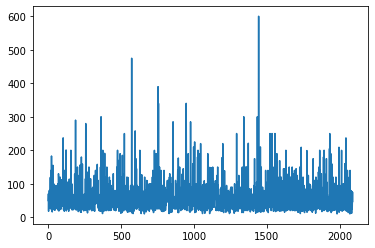

In [60]:
y_pred = model.predict(X_test_norm)
y_pred_denorm = y_pred[:, 0] * (y_max - y_min) + y_min
y_test_denorm = y_test_norm * (y_max - y_min) + y_min
error_denorm = np.abs(y_pred_denorm - y_test)
plt.plot(range(y_pred.shape[0]), error_denorm)

print(f'Error medio absoluto: {error_denorm.mean()}')
print(f'Error cuadrático medio: {np.mean(error_denorm**2)}')
print(f'Cometemos un error de {round(error_denorm.mean(),2)}€ al tratar de predecir una vivienda.')

In [61]:
# Modelo de Regresión 2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='linear'))

# Crear nuestro MLP y luego compilar el modelo utilizando el error porcentual absoluto medio
# como nuestra pérdida, lo que implica que buscamos minimizar la diferencia porcentual absoluta
# entre nuestras *predictions* de precios y los *actual prices*.
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=2)

Epoch 1/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 2/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 3/20
3717/3717 [==============================] - 7s 2ms/step - loss: 0.0016 - val_loss: 0.0025
Epoch 4/20
3717/3717 [==============================] - 9s 2ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 5/20
3717/3717 [==============================] - 6s 1ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 6/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 7/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 8/20
3717/3717 [==============================] - 6s 1ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 9/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 10/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.001

In [62]:
loss = model.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')

66/66 [==============================] - 0s 1ms/step - loss: 0.0021
Loss=0.0020980597473680973


In [63]:
# Modelo de Regresión 3
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Sin funcion de act y solo 1 neurona

# Crear nuestro MLP y luego compilar el modelo utilizando el error porcentual absoluto medio
# como nuestra pérdida, lo que implica que buscamos minimizar la diferencia porcentual absoluta
# entre nuestras *predictions* de precios y los *actual prices*.
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=2)

Epoch 1/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 2/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 3/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 4/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 5/20
3717/3717 [==============================] - 5s 1ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 6/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 7/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 8/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 9/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 10/20
3717/3717 [==============================] - 6s 2ms/step - loss: 0.001

In [64]:
loss = model.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')

66/66 [==============================] - 0s 1ms/step - loss: 0.0017
Loss=0.0016923024086281657


In [65]:
# Modelo de Regresión 4
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))  # Sin funcion de act y solo 1 neurona

# Crear nuestro MLP y luego compilar el modelo utilizando el error porcentual absoluto medio
# como nuestra pérdida, lo que implica que buscamos minimizar la diferencia porcentual absoluta
# entre nuestras *predictions* de precios y los *actual prices*.
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=4)

Epoch 1/20
1859/1859 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0037
Epoch 2/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 3/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 4/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0024 - val_loss: 0.0034
Epoch 5/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 6/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 7/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 8/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 9/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 10/20
1859/1859 [==============================] - 3s 2ms/step - loss: 0.002

In [66]:
loss = model.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')

66/66 [==============================] - 0s 1ms/step - loss: 0.0022
Loss=0.002177753485739231


Como podemos ver, el modelo de regrresión 1 es el mejor. Nos quedaríamos con esa arquitectura de red.

In [67]:
# Modelo de Regresión:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona

# Crear nuestro MLP y luego compilar el modelo utilizando el error porcentual absoluto medio
# como nuestra pérdida, lo que implica que buscamos minimizar la diferencia porcentual absoluta
# entre nuestras *predictions* de precios y los *actual prices*.
model.compile(loss='mean_squared_error', optimizer='RMSProp')

model.fit(X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=4)

Epoch 1/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 2/20
1859/1859 [==============================] - 4s 2ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 3/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 4/20
1859/1859 [==============================] - 2s 1ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 5/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 6/20
1859/1859 [==============================] - 2s 1ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 7/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 8/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 9/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 10/20
1859/1859 [==============================] - 3s 1ms/step - loss: 0.001

In [68]:
loss = model.evaluate(X_test_norm, y_test_norm)
print(f'Loss={loss}')

66/66 [==============================] - 0s 1ms/step - loss: 0.0021
Loss=0.0020650045480579138


# **6. Construcción CNN**

In [69]:
X_train_image = X_train_image / 255
X_test_image = X_test_image / 255

In [70]:
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split

X_train_image, X_val_image, y_train, y_val = train_test_split(X_train_image, y_norm, test_size=0.1, random_state=0)

In [71]:
# Importar los paquetes necesarios
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input

# Funciones que crean una CNN
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # Inicializar la forma de entrada y la dimensión del canal, asumiendo
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1

    # Definir la entrada del modelo
    inputs = Input(shape=inputShape)
    # Bucle sobre el número de filtros
    for (i, f) in enumerate(filters):
        # Si esta es la primera capa CONV, configure la entrada apropiadamente
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Activation("relu")(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar el volumen, luego FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16)(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    # Aplicar otra capa FC, esta para que coincida con la cantidad de nodos que salen del MLP
    x = Dense(4)(x)
    x = Activation("relu")(x)
    # Verificar si se debe agregar el nodo de regresión
    if regress:
        x = Dense(1, activation="linear")(x)
    # Construir la CNN
    model = Model(inputs, x)
    # Retornar la CNN
    return model

# Encontrar el precio de vivienda más alto en el conjunto de entrenamiento y usarlo para escalar nuestros
# precios de vivienda al rango [0, 1] (conducirá a un mejor entrenamiento y convergencia).
maxPrice = y_train.max()
Y_train = y_train / maxPrice
Y_val = y_val / maxPrice
Y_test = y_test / maxPrice

# Crear y entrena el modelo
def create_and_train_cnn_model():
    # Crear nuestra red neuronal convolucional y luego compilar el modelo utilizando el error porcentual
    # absoluto medio como nuestra pérdida, lo que implica que busca minimizar la diferencia porcentual
    # absoluta entre nuestras *predicciones* de precios y los *actual prices*.
    model = create_cnn(112, 112, 3, regress=True)

    opt = Adam(lr=1e-3, decay=1e-3)
    model.compile(loss="mean_squared_error", optimizer=opt)

    # Train y model
    print("[INFO] training model...")

    model.fit(x=X_train_image, y=Y_train, 
        validation_data=(X_val_image, Y_val),
        epochs=2, batch_size=4)
    return model

In [72]:
import locale
def validation_cnn_model(model):
    # Hacer predicciones sobre los datos de prueba
    print("[INFO] predicting house prices...")
    preds = model.predict(X_test_image)

    # Calcular la diferencia entre los precios de la vivienda *predicted* y los precios de la vivienda
    # *actual*, luego calcule la diferencia porcentual y la diferencia porcentual absoluta.
    diff = preds.flatten() - Y_test
    percentDiff = (diff / Y_test) * 100
    absPercentDiff = np.abs(percentDiff)

    # compute the mean and standard deviation of the absolute percentage difference
    mean = np.mean(absPercentDiff)
    std = np.std(absPercentDiff)

    # finally, show some statistics on our model
    locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
    print("[INFO] avg. house price: {}, std house price: {}".format(
        locale.currency(data["Price"].mean(), grouping=True),
        locale.currency(data["Price"].std(), grouping=True)))
    print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

In [73]:
from tensorflow.keras.optimizers import Adam
cnn_model = create_and_train_cnn_model()

[INFO] training model...
Epoch 1/2
1859/1859 [==============================] - 116s 62ms/step - loss: 0.0632 - val_loss: 0.0063
Epoch 2/2
1859/1859 [==============================] - 129s 69ms/step - loss: 0.0078 - val_loss: 0.0052


In [74]:
validation_cnn_model(cnn_model)

[INFO] predicting house prices...
[INFO] avg. house price: $71.52, std house price: $67.86
[INFO] mean: 99.83%, std: 0.11%


# **7. Modelo MLP + CNN**

In [75]:
from sklearn import preprocessing
# Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios
# y vamos a normalizarlos también entre 0 y 1)

min_max_scaler = preprocessing.MinMaxScaler()

X_norm = min_max_scaler.fit_transform(X_train_data)
y_norm = (y_train - y_train.min()) / (y_train.max() - y_train.min())

X_test_norm = min_max_scaler.fit_transform(X_test_data)
y_test_norm = (y_test - y_train.min()) / (y_train.max() - y_train.min())

X_train_image = X_train_image/255
X_test_image = X_test_image/255

maxPrice = y_train.max()
Y_train = y_train / maxPrice
Y_test = y_test / maxPrice

In [76]:
# Creamos un modelo para hacer regresión
from keras.models import Sequential
from keras.layers import Dense

def create_mlp(dim):  
    model = Sequential()
    model.add(Dense(8, input_shape=dim, activation='relu'))
    model.add(Dense(4, activation='relu'))
    return model

In [77]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, Input

def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
    # Inicializar la forma de entrada y la dimensión del canal, asumiendo
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1

    # Definir la entrada del modelo
    inputs = Input(shape=inputShape)
    # Bucle sobre el número de filtros
    for (i, f) in enumerate(filters):
        # Si esta es la primera capa CONV, configure la entrada apropiadamente
        if i == 0:
            x = inputs
        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Activation("relu")(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar el volumen, luego FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Dense(16)(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    # Aplicar otra capa FC, esta para que coincida con la cantidad de nodos que salen del MLP
    x = Dense(4)(x)
    x = Activation("relu")(x)
    # Verificar si se debe agregar el nodo de regresión
    if regress:
        x = Dense(1, activation="linear")(x)
    # Construir la CNN
    model = Model(inputs, x)
    # Retornar la CNN
    return model


In [79]:
from tensorflow.keras.layers import concatenate

def combined_input_model(models_outputs, models_inputs):
    # Crear la entrada a nuestro conjunto final de capas como la *salida* de ambos el MLP y la CNN
    combinedInput = concatenate(models_outputs)
    # Nuestro cabezal de capa FC final tendrá dos capas densas, la última será nuestro cabezal de regresión
    x = Dense(4, activation="relu", name='final_dense_a')(combinedInput)
    x = Dense(1, activation="linear", name='final_dense_b')(x)
    # Nuestro modelo final aceptará datos categóricos/numéricos en la entrada MLP e imágenes
    # en la entrada CNN, generando un valor único (el precio previsto de la casa).
    return Model(inputs=models_inputs, outputs=x)

# Crear los modelos MLP y CNN
mlp = create_mlp([X_train_data.shape[1]])
cnn = create_cnn(112,112,3,regress = False)

finalModel = combined_input_model([mlp.output, cnn.output], [mlp.input, cnn.input])

In [80]:
import locale
print("[INFO] predicting house prices...")
preds = finalModel.predict([X_test_norm, X_test_image])
# Calcule la diferencia entre los precios de la vivienda *predicted* y los precios de la vivienda
# *actual*, luego calcule la diferencia porcentual y la diferencia porcentual absoluta.
diff = preds.flatten() - Y_test
percentDiff = (diff / Y_test) * 100
absPercentDiff = np.abs(percentDiff)

# Calcular la media y la desviación estándar de la diferencia porcentual absoluta
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# Finalmente, mostrar algunas estadísticas sobre nuestro modelo
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
    locale.currency(data["Price"].mean(), grouping=True),
    locale.currency(data["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $71.52, std house price: $67.86
[INFO] mean: 100.28%, std: 0.25%


# **8. Conclusión**

Esperaba que los resultados fueran mejores que en el módulo ML. Sin embargo, es posible que el resultado no sea tan bueno debido a que no tenemos suficientes datos para entrenar correctamente una red neuronal. 

Para mejorar el resultado se pueden hacer varias cosas:

1. Probablemente lo más importante sea, como dice Andrew Ng, mejorar la calidad de los datos ingestados en los modelos. Al final, el performance del modelo dependerá más de la calidad de los datos iniciales más que del modelo en sí.

2. Una vez mejorados los datos, podríamos probar con más arquitecturas para encontrar otras más adecuadas.

3. Entrenar los modelos durante más tiempo.